In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
dataset = pd.read_csv('assets.csv')
assets = dataset['Assets']

data = yf.download(assets.to_list(), start="2019-01-01", end="2024-01-01")


print(data.head(20))
print("\n\n")
print(data.tail(20))


[*********************100%%**********************]  28 of 28 completed


Price      Adj Close                                                          \
Ticker          ACUR       AGCO       CVLT       ENSG INMD       KBWR   MITK   
Date                                                                           
2019-01-02   0.13950  47.883610  57.439999  35.161743  NaN  38.948833  11.27   
2019-01-03   0.12272  46.857658  55.779999  34.720043  NaN  39.378551  10.67   
2019-01-04   0.12030  49.616520  58.060001  35.907127  NaN  40.220768  10.86   
2019-01-07   0.12030  51.280472  58.459999  36.496082  NaN  40.478592  11.04   
2019-01-08   0.12000  51.883976  59.930000  37.535923  NaN  40.891125  10.87   
2019-01-09   0.14250  52.763359  60.500000  38.667797  NaN  41.157543  10.85   
2019-01-10   0.14250  53.409969  60.810001  37.223053  NaN  41.157543  10.87   
2019-01-11   0.17500  53.409969  61.080002  36.891766  NaN  41.234890  10.89   
2019-01-14   0.17500  53.289268  60.200001  36.965389  NaN  41.389576  10.98   
2019-01-15   0.17000  53.340996  61.0800

In [3]:

data.fillna(method='ffill', inplace=True)
data.fillna(method='bfill', inplace=True)


log_returns = np.log(data / data.shift(1))


log_returns.dropna(inplace=True)



c:\Users\moumi\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\internals\blocks.py:329: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


In [6]:
stats_summary = data.describe()

mean_annual_returns = log_returns.mean() * 252

annual_volatility = log_returns.std() * np.sqrt(252)

skewness = log_returns.skew()
kurtosis = log_returns.kurtosis()

summary_stats = pd.DataFrame({
    'Mean Annual Returns': mean_annual_returns,
    'Annual Volatility': annual_volatility,
    'Skewness': skewness,
    'Kurtosis': kurtosis
})

print(summary_stats)

                  Mean Annual Returns  Annual Volatility  Skewness    Kurtosis
Price     Ticker                                                              
Adj Close ACUR              -1.859236           7.653713 -2.040424  108.663082
          AGCO               0.145374           0.414732 -0.414317    8.787798
          CVLT              -0.084137           0.382435 -2.161581   16.755901
          ENSG               0.175501           0.452998 -0.974769   17.547479
          INMD               0.338890           0.678026 -0.133218    2.689285
...                               ...                ...       ...         ...
Volume    RSPG               1.047887          12.945979  0.388133    3.039851
          SKY                0.454403           7.155675  0.437009    2.239499
          SMTC              -0.750328           7.179528  0.229289    2.841558
          STEP               0.677702           6.811955  0.395429    6.412636
          WINA               2.549519          10.63

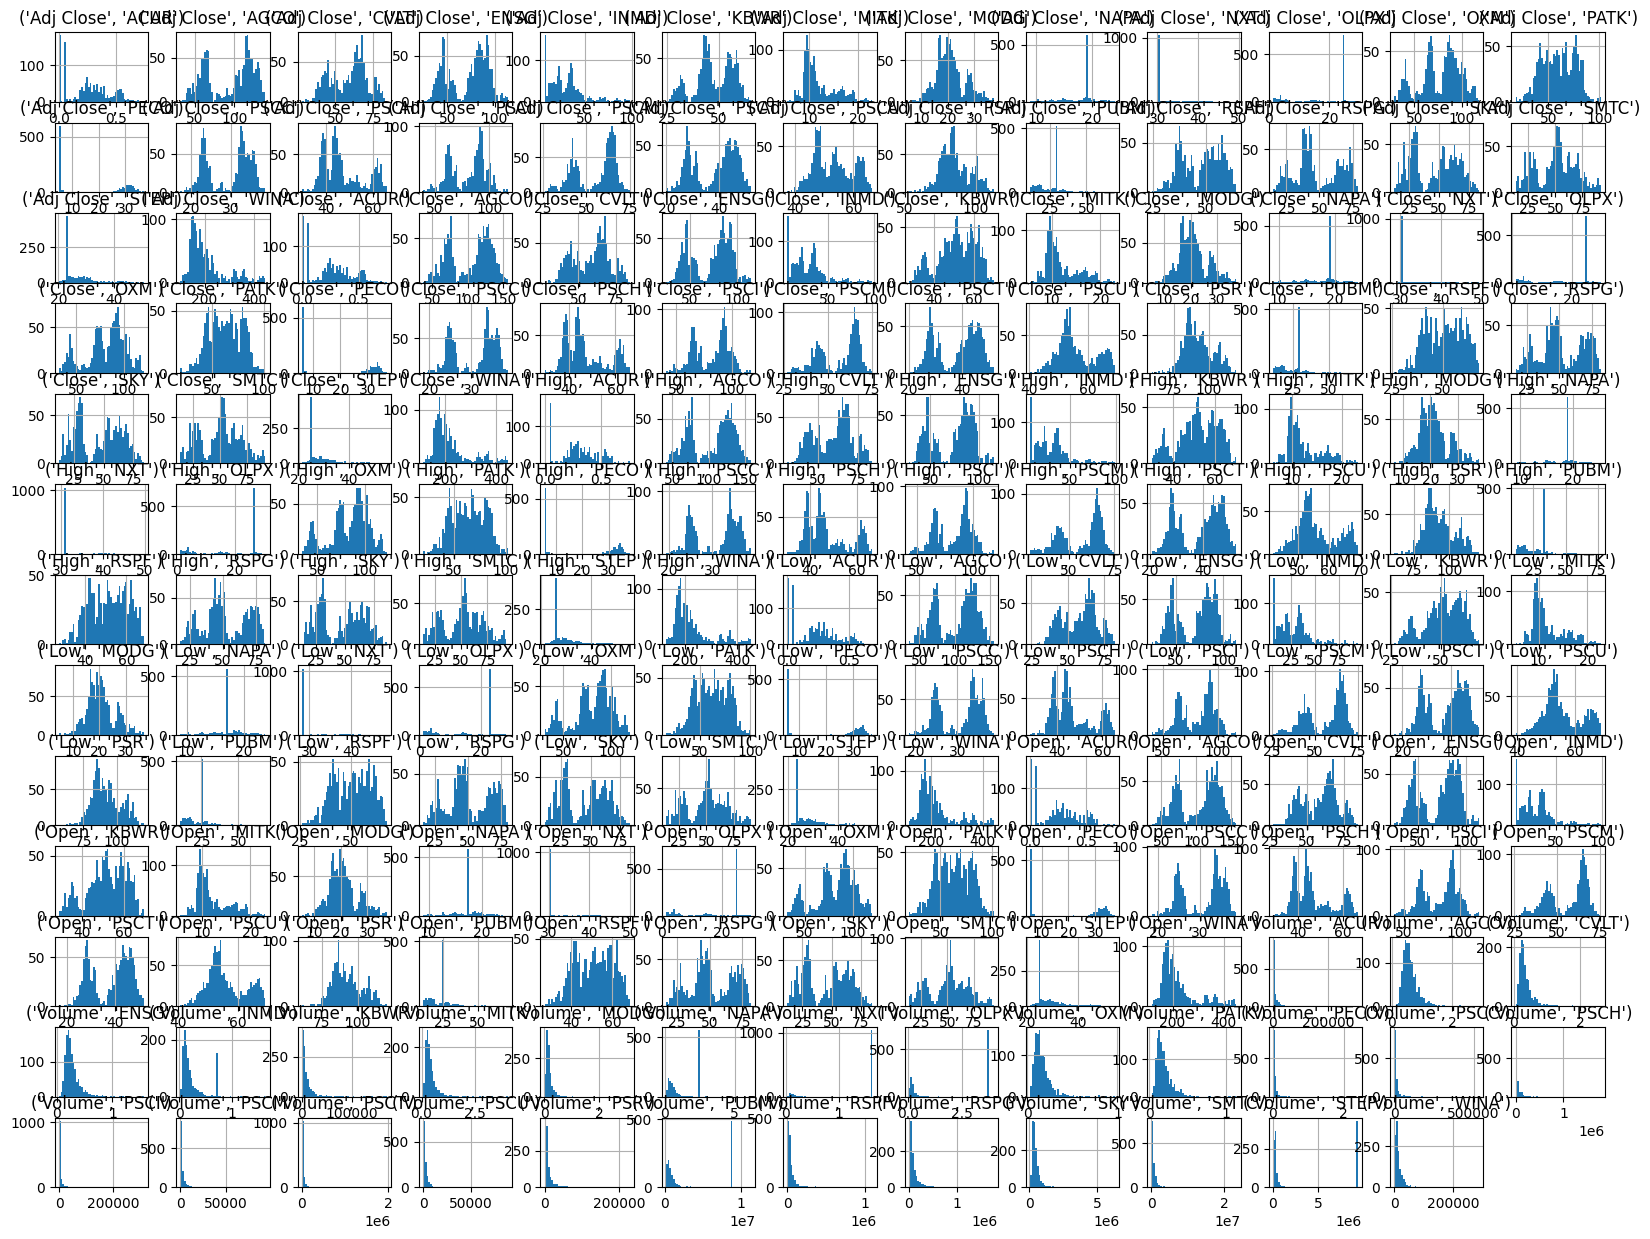

In [7]:

data.hist(bins=50, figsize=(20,15))
plt.show()

